In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix

The x and y coordinates have been generated to create spirally distributed blobs in two colors. 

Here is the scatter plot of the spirals: 



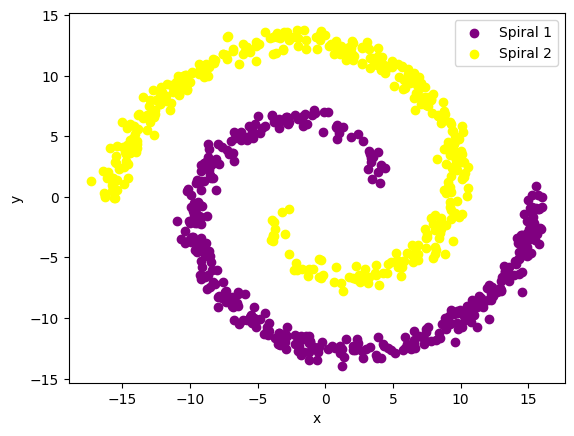

In [ ]:
print('The x and y coordinates have been generated to create spirally distributed blobs in two colors. \n')
N = 400
noise = 0.5
theta = np.sqrt(np.random.rand(N)) * 2 * np.pi
firstR = 2*theta + np.pi
secondR = -2*theta - np.pi
firstX = firstR * np.cos(theta) + noise * np.random.randn(N)
firstY = firstR * np.sin(theta) + noise * np.random.randn(N)
secondX = secondR * np.cos(theta) + noise * np.random.randn(N)
secondY = secondR * np.sin(theta) + noise * np.random.randn(N)
X = np.vstack([np.column_stack([firstX, firstY]), np.column_stack([secondX, secondY])])
y = np.hstack([np.zeros(N), np.ones(N)])

# 2.2 create scatter plot
print('Here is the scatter plot of the spirals: \n')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='purple', label="Spiral 1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='yellow', label="Spiral 2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024, stratify=y)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=1000, alpha=0.001,
                     solver='adam', verbose=True, random_state=2024, learning_rate_init=0.01)
mlp.fit(X_train, y_train)
print()

Iteration 1, loss = 0.84264442
Iteration 2, loss = 0.75941773
Iteration 3, loss = 0.65077143
Iteration 4, loss = 0.64329512
Iteration 5, loss = 0.60894419
Iteration 6, loss = 0.59755610
Iteration 7, loss = 0.57647655
Iteration 8, loss = 0.55552011
Iteration 9, loss = 0.53135410
Iteration 10, loss = 0.51271505
Iteration 11, loss = 0.48471456
Iteration 12, loss = 0.45704765
Iteration 13, loss = 0.43625208
Iteration 14, loss = 0.41550878
Iteration 15, loss = 0.37677378
Iteration 16, loss = 0.35198886
Iteration 17, loss = 0.33157448
Iteration 18, loss = 0.31589825
Iteration 19, loss = 0.29522324
Iteration 20, loss = 0.26558331
Iteration 21, loss = 0.24044969
Iteration 22, loss = 0.22474748
Iteration 23, loss = 0.20687049
Iteration 24, loss = 0.18755706
Iteration 25, loss = 0.17066538
Iteration 26, loss = 0.15870859
Iteration 27, loss = 0.14935217
Iteration 28, loss = 0.14282203
Iteration 29, loss = 0.13563973
Iteration 30, loss = 0.12034978
Iteration 31, loss = 0.11499961
Iteration 32, los

Here is the loss curve: 



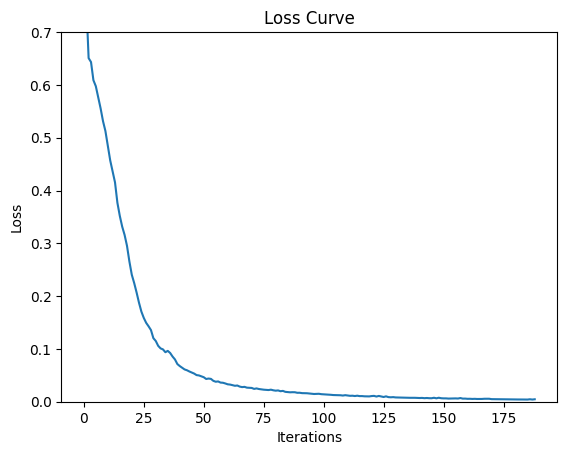

In [ ]:
print('Here is the loss curve: \n')
plt.plot(mlp.loss_curve_)
plt.title('Loss Curve')
plt.ylim(0, .7)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()


In [ ]:
y_pred = mlp.predict(X_test)
score = accuracy_score(y_test, y_pred)
print('Accuracy:', score, '\n')

Accuracy: 0.9972222222222222 



Here is the confusion matrix: 



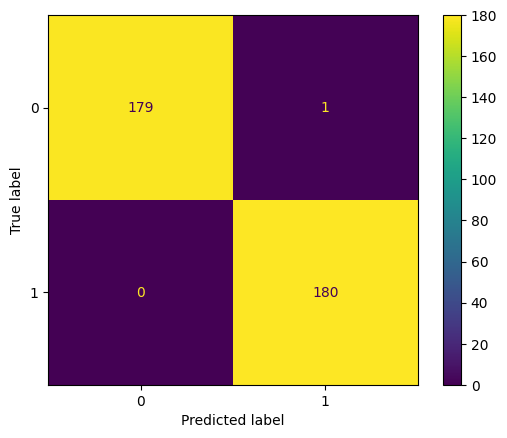

In [ ]:
print('Here is the confusion matrix: \n')
cm = confusion_matrix(y_test, y_pred, labels=mlp.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_).plot()
plt.show()
